Online Shopping Cart 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [79]:
#load dataset 

df =pd.read_csv('Ecommerce.csv')
df.head()

,customer_id,session_id,visit_date,device_type,user_type,marketing_channel,product_id,product_category,unit_price,quantity,...,review_text,review_helpful_votes,payment_method,visit_day,visit_month,visit_weekday,visit_season,session_duration_bucket,revenue_normalized,location
0,1803,0,28-11-2024,2,1,2,894,6,651.57,1,...,1,0,1,28,11,3,0,Long,0.000000,209
1,7964,1,25-09-2024,2,0,4,844,2,945.27,4,...,1,0,2,25,9,2,0,Long,0.000000,213
2,6890,2,31-05-2024,1,1,0,865,0,400.44,4,...,1,0,2,31,5,4,1,Short,0.000000,10
3,4949,3,30-01-2024,1,0,2,851,3,1268.54,2,...,10,4,1,30,1,1,3,Very Long,0.305504,46
4,4896,4,25-02-2024,1,1,5,794,3,880.81,3,...,1,0,1,25,2,6,3,Very Short,0.000000,118


In [80]:
# sirf required columns uthao
dataset= df[["customer_id", "session_id", "product_id", "product_category","unit_price","quantity", "purchased"]]
dataset.to_csv("new_ecommerce_data.csv", index=False)
dataset.head()

,customer_id,session_id,product_id,product_category,unit_price,quantity,purchased
0,1803,0,894,6,651.57,1,0
1,7964,1,844,2,945.27,4,0
2,6890,2,865,0,400.44,4,0
3,4949,3,851,3,1268.54,2,1
4,4896,4,794,3,880.81,3,0


In [81]:
#columns abanddonment
dataset["aband"] = dataset["purchased"].apply(lambda x: 0 if x == 1 else 1)
dataset.head()

/tmp/ipykernel_17983/3604220331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["aband"] = dataset["purchased"].apply(lambda x: 0 if x == 1 else 1)


,customer_id,session_id,product_id,product_category,unit_price,quantity,purchased,aband
0,1803,0,894,6,651.57,1,0,1
1,7964,1,844,2,945.27,4,0,1
2,6890,2,865,0,400.44,4,0,1
3,4949,3,851,3,1268.54,2,1,0
4,4896,4,794,3,880.81,3,0,1


In [82]:
# cart value(total price)
dataset["cart_value"]= dataset["unit_price"] * dataset["quantity"]
dataset.head()

/tmp/ipykernel_17983/3835206512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["cart_value"]= dataset["unit_price"] * dataset["quantity"]


,customer_id,session_id,product_id,product_category,unit_price,quantity,purchased,aband,cart_value
0,1803,0,894,6,651.57,1,0,1,651.57
1,7964,1,844,2,945.27,4,0,1,3781.08
2,6890,2,865,0,400.44,4,0,1,1601.76
3,4949,3,851,3,1268.54,2,1,0,2537.08
4,4896,4,794,3,880.81,3,0,1,2642.43


In [83]:
#category wise abandonment
cat_aband=(
    dataset.groupby("product_category")["aband"]
    .mean()
    .reset_index()
)

cat_aband["aband"]*= 100
cat_aband

,product_category,aband
0,0,77.721197
1,1,78.738087
2,2,77.726290
3,3,79.243421
4,4,77.309613
5,5,76.881550
6,6,75.321337
7,7,77.416206


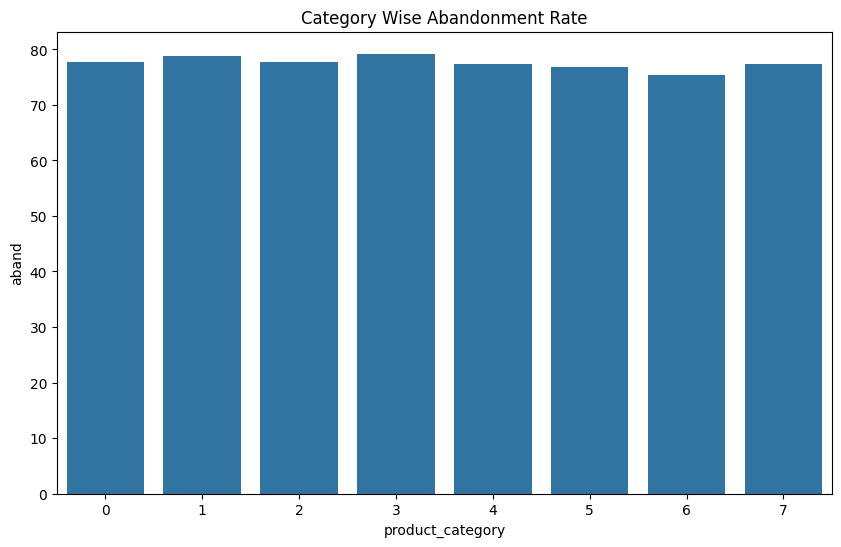

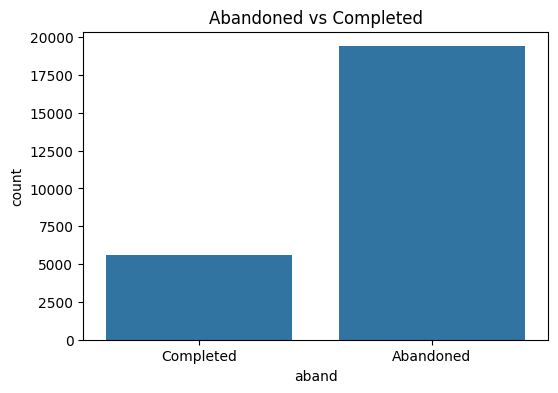

In [84]:
# Visualss Wagera
plt.figure(figsize=(10,6))
sns.barplot(
    data=cat_aband,
    x="product_category",
    y="aband"
)
plt.title("Category Wise Abandonment Rate")
plt.xticks()
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="aband",data=dataset)
plt.title("Abandoned vs Completed")
plt.xticks([0,1], ["Completed","Abandoned"])
plt.show()

In [85]:
#summary wala
print("summary stats")
print(dataset["cart_value"].describe())
print("\noverall abandonment rate:", dataset["aband"].mean() * 100,"%")

summary stats
count    25000.000000
mean      1950.249582
std       1569.020621
min         51.000000
25%        774.872500
50%       1473.935000
75%       2733.375000
max       7993.160000
Name: cart_value, dtype: float64

overall abandonment rate: 77.536 %


In [86]:
# Logistic Regression
x= dataset[["cart_value"]]
y=dataset["aband"]

x_train,x_test,y_train,y_test= tts(x,y,test_size=0.3, random_state=42)

model= LogisticRegression()
model.fit(x_train, y_train)

y_prob= model.predict_proba(x_test)[:, 1]

print("\nRegression R2 Score:", r2_score(y_test, y_prob))


Regression R2 Score: 0.00012682630540972184


In [87]:
# smooth curve karo
sorted_idx= np.argsort(x_test.values.ravel())
x_sorted= x_test.values.ravel()[sorted_idx]
y_prob_sorted= y_prob[sorted_idx]

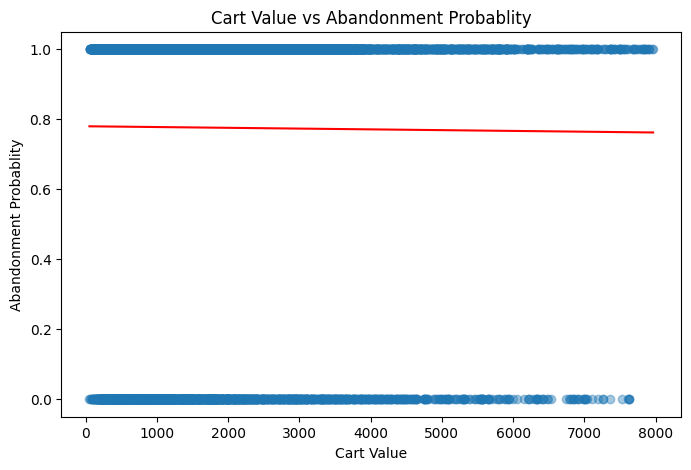

In [88]:
# PLot Wagera sab

plt.figure(figsize=(8,5))
plt.scatter(x_test, y_test, alpha=0.4)
plt.plot(x_sorted, y_prob_sorted, color='red', label='Predicted Probability')
# plt.plot(x_test, y_pred, color='red')
plt.xlabel("Cart Value")
plt.ylabel("Abandonment Probablity")
plt.title("Cart Value vs Abandonment Probablity")
plt.show()


/tmp/ipykernel_17983/3149319916.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = dataset_heat.groupby("cart_bin")["abandon_prob"].mean().to_frame()


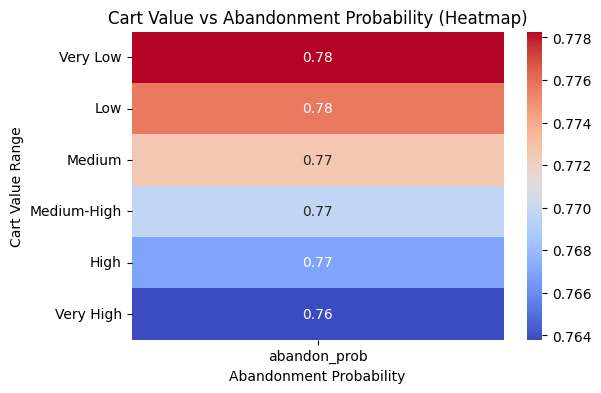

In [90]:
dataset_heat =pd.DataFrame({
    "cart_value": x_test["cart_value"],
    "abandon_prob": y_prob
})

dataset_heat["cart_bin"] = pd.cut(
    dataset_heat["cart_value"],
    bins=6,
    labels=["Very Low", "Low", "Medium", "Medium-High","High", "Very High"]

)

heatmap_data = dataset_heat.groupby("cart_bin")["abandon_prob"].mean().to_frame()
plt.figure(figsize=(6,4))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Cart Value vs Abandonment Probability (Heatmap)")
plt.xlabel("Abandonment Probability")
plt.ylabel("Cart Value Range")
plt.show()
